In [45]:
import pandas as pd
import numpy as np

importing image

In [46]:
from tensorflow.keras.preprocessing import  image

In [47]:
img=image.load_img('10000.jpg',target_size=(224,224))

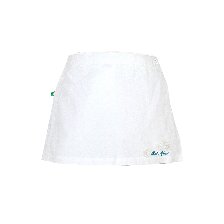

In [48]:
img

In [49]:
# making img to array
img_arr=image.img_to_array(img)
img_arr
img_arr.shape

(224, 224, 3)

In [50]:
# reshaping image from 3d to 4d for keras
import numpy as np
expended_img_arr=np.expand_dims(img_arr,axis=0)
expended_img_arr.shape

(1, 224, 224, 3)

importing resnet for pretrained model for transfer learning

In [51]:
from tensorflow.keras.applications.resnet50 import  ResNet50,preprocess_input

In [52]:
#importing maxpooling 
from tensorflow.keras.layers import GlobalMaxPooling2D

In [65]:
# making resnet50 object include_top=false for we are adding our layers
model=ResNet50(weights='imagenet' ,include_top=False, input_shape=(224,224,3))
# stop training our model
model.trainable=False
# importing sequential model 
from tensorflow.keras import  Sequential
model=Sequential([
    model,
    GlobalMaxPool2D()
])

In [66]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_max_pooling2d_2 (Gl  (None, 2048)              0         
 obalMaxPooling2D)                                               
                                                                 
Total params: 23587712 (89.98 MB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [54]:
# changing our image for resnet50 to make image able to read by resnet
preprocessed_img=preprocess_input(expended_img_arr)
preprocessed_img.shape

(1, 224, 224, 3)

feature extraction using resnet into (1,2048) features for one image

In [55]:
model.predict(preprocessed_img)
model.predict(preprocessed_img).shape

1/1 [==============================] - 0s 128ms/step


(1, 2048)

In [56]:
# flattning our array means 2d to 1d
model.predict(preprocessed_img).flatten()
model.predict(preprocessed_img).flatten().shape

1/1 [==============================] - 0s 157ms/step


(2048,)

In [62]:
# normalizing our image means all values in an arrays is ranging 0 to 1(refer documentation)
from numpy.linalg import  norm
print(norm(model.predict(preprocessed_img).flatten()))
model.predict(preprocessed_img).flatten()/norm(model.predict(preprocessed_img).flatten())

1/1 [==============================] - 0s 213ms/step
269.5729
1/1 [==============================] - 0s 153ms/step


array([0.01886856, 0.01673298, 0.003997  , ..., 0.00810945, 0.010614  ,
       0.05708205], dtype=float32)